In [6]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv('C:/Users/shash/Desktop/spam.csv', encoding='latin-1')

In [8]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [9]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2673,ham,"Good afternoon, my boytoy ... How are you feel...",NaN,NaN,NaN
3687,ham,I'll meet you in the lobby,NaN,NaN,NaN
695,ham,Good. Good job. I like entrepreneurs,NaN,NaN,NaN
3251,ham,Come to medical college at 7pm ......forward i...,NaN,NaN,NaN
1678,ham,So many people seems to be special at first si...,NaN,NaN,NaN


In [10]:
df.shape

(5572, 5)

In [11]:
#1.Data cleaning
#2.EDA
#3.Text preprocessing
#6.Converting into Website

# DATA CLEANING


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [13]:
#drop last 3 cos
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [14]:
df.sample(5)

,v1,v2
472,ham,Nothing. I meant that once the money enters yo...
3175,ham,Havent still waitin as usual... ÌÏ come back s...
3730,ham,Isn't frnd a necesity in life? imagine urself ...
5424,ham,U horrible gal... U knew dat i was going out w...
1536,ham,How's it feel? Mr. Your not my real Valentine ...


In [15]:
#renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1531,ham,Oh dang! I didn't mean o send that to you! Lol!
1647,ham,Evening * v good if somewhat event laden. Will...
823,spam,25p 4 alfie Moon's Children in need song on ur...
3582,ham,I sent your maga that money yesterday oh.
5243,ham,Of course ! Don't tease me ... You know I simp...


In [16]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [ ]:
df.head()

In [114]:
#checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [115]:
#check duplicate values
df.duplicated().sum()

403

In [96]:
#remove duplicate values
df=df.drop_duplicates(keep="first")

In [97]:
df.duplicated().sum()

0

In [116]:
df.shape

(5572, 2)

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['target'].value_counts()

target
ham     4825
spam     747
Name: count, dtype: int64

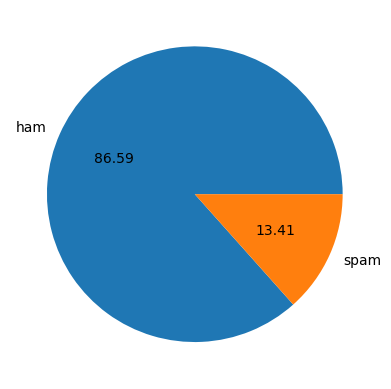

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [19]:
import nltk

In [20]:
!pip install nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
#count num of characters
df.loc[:,'num_characters']=df['text'].apply(len)

In [25]:
#count num of words
df.loc[:,'num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
#count num of sentences
df.loc[:,'num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
#ham messages
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [29]:
#for spam messages
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [25]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#for spam messages
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [33]:
#plotting a histogram for both categories spam and ham
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

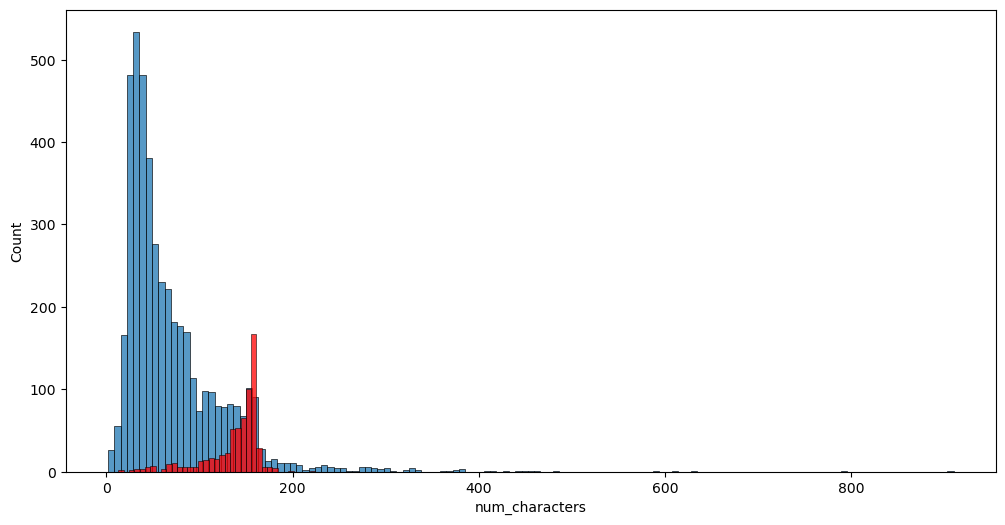

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

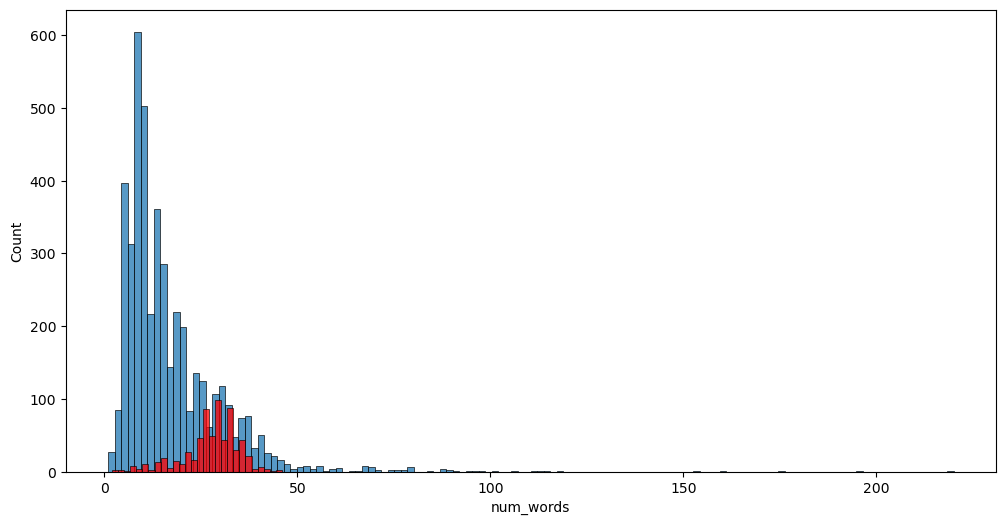

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

In [37]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()


 3.Data Preprocessing
.Lower case
.Tokenization
.Removing special characters
.Removing stop words and punctuation
.Stemming

In [38]:
import string
from nltk.corpus import stopwords

def transform_text(text):
        
        text=text.lower()
        text=nltk.word_tokenize(text)
    
        y=[]
        for i in text:
            if i.isalnum():
                y.append(i)
     
        text=y[:]
        y.clear()
    
        for i in text:
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(i)
            
        text=y[:]
        y.clear()
    
        for i in text:
            y.append(ps.stem(i))
        
        return " ".join(y)

In [41]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [42]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [40]:
#stemming
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("loving")

'love'

In [43]:
 df['transformed_text']=df['text'].apply(transform_text)


In [44]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
!pip install wordcloud matplotlib

In [45]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [46]:
spam_text = df[df['target']==1]['transformed_text'].str.cat(sep=" ")
if len(spam_text) > 0:
    spam_wc = wc.generate(spam_text)
else:
    print("No text available for spam messages.")

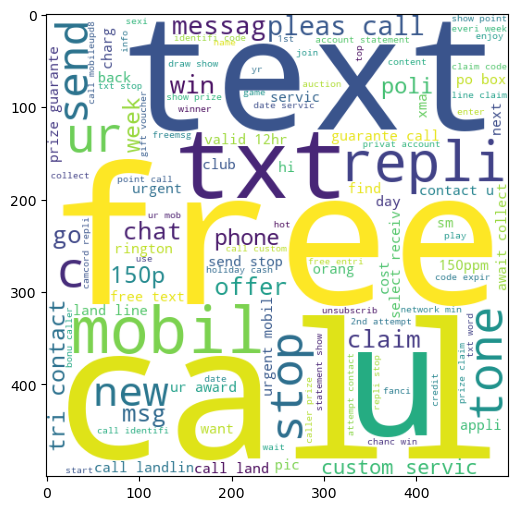

In [47]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [48]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


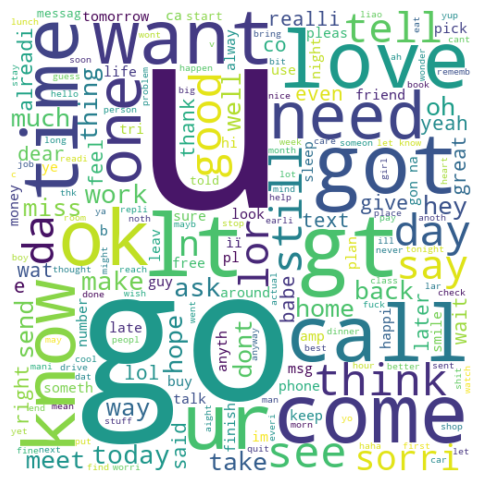

In [49]:
ham_text = df[df['target'] == 0]['transformed_text'].str.cat(sep=" ")

if len(ham_text) > 0:
    ham_wc = wc.generate(ham_text)

    plt.figure(figsize=(15, 6))
    plt.imshow(ham_wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
else:
    print("No text available for ham messages.")

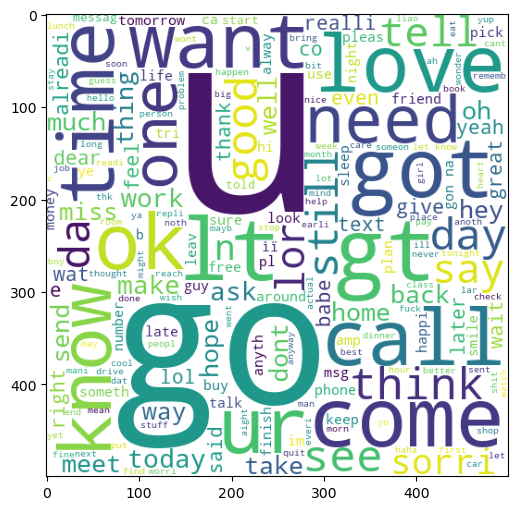

In [50]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [51]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [52]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [53]:
len(spam_corpus)

9939

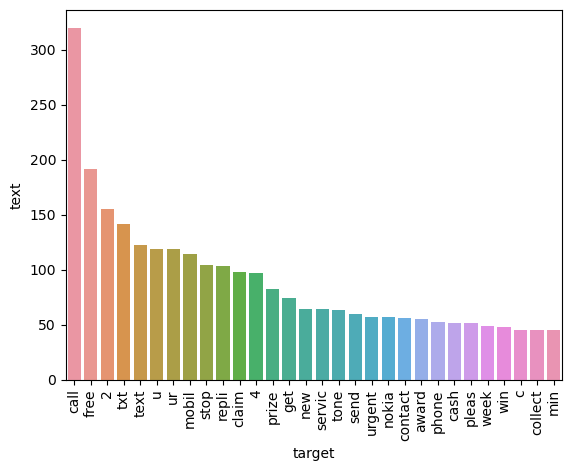

In [54]:
from collections import Counter

spam_corpus_counter = Counter(spam_corpus)
spam_corpus_common = spam_corpus_counter.most_common(30)
spam_corpus_df = pd.DataFrame(spam_corpus_common, columns=['target', 'text'])

sns.barplot(x='target', y='text', data=spam_corpus_df)
plt.xticks(rotation='vertical')
plt.show()

In [55]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [56]:
print(df.columns)

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences',
       'transformed_text'],
      dtype='object')


In [57]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Module building

In [58]:
#using naive bayes
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [59]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [60]:
X.shape

(5169, 3000)

In [61]:
y = df['target'].values

In [62]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [69]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='11')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [70]:
#creating a dictionary(keys-name of the algo,value=above objects)
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score

# Load a dataset for demonstration purposes
data = load_iris()
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
svc = SVC()

# Define the function
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')  # Use average='macro' for multiclass classification
    
    return accuracy, precision

# Train the classifier and print the results
accuracy, precision = train_classifier(svc, X_train, y_train, X_test, y_test)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")


Accuracy: 1.0
Precision: 1.0


In [72]:
# model improve
# 1. Change the max_features parameter of TfIdf


In [73]:
import pickle
pickle.dump(tfidf,open(' vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))